# Signal and Imaging acquisition and Modelling in Environment
exam project june 2023

Davide Zangari 844760

## Data Visualisation
some insights on the types and the spans of the variables

In [1]:
!pip install -q segmentation-models-pytorch
!pip install -q torchsummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.6 MB/s eta 0:00:00


In [2]:
# import libraries
import numpy as np
import pandas as pd
import glob

import PIL
PIL.__version__
from PIL import Image
from glob import glob
import os
os.getcwd()
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow import io
import pandas as pd
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import torch
torch.__version__
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
torchvision.__version__
from torchvision import transforms


from torchvision.io import read_image, ImageReadMode
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable
from PIL import Image
import cv2
import albumentations as A
import time
import torchvision.transforms as transforms
from tqdm.notebook import tqdm
from torchsummary import summary
import segmentation_models_pytorch as smp

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the best model
model=torch.load("/content/drive/MyDrive/Master degree AI/Environment/project5/best_model3.pt")

In [ ]:
import pathlib
# read directories and labels file
image_dir = '/content/drive/MyDrive/Master degree AI/Environment/project5/original_images'
mask_dir = '/content/drive/MyDrive/Master degree AI/Environment/project5/label_images_semantic'
labels = pd.read_csv('/content/drive/MyDrive/Master degree AI/Environment/project5/class_dict_seg.csv')
labelll='/content/drive/MyDrive/Master degree AI/Environment/project5/RGB_color_image_masks'

image_list = os.listdir(image_dir) # get all the image paths
mask_list=os.listdir(mask_dir) # get all the mask paths
# sort the paths
image_list.sort()
mask_list.sort()
inp_img_list = [os.path.join(image_dir,i) for i in image_list] # get the image paths
mask_list = [os.path.join(labelll,i) for i in mask_list] # get the mask paths
#mask_list

In [ ]:
type(inp_img_list)

list

In [ ]:
mask_list[0]

'/content/drive/MyDrive/Master degree AI/Environment/project5/RGB_color_image_masks/000.png'

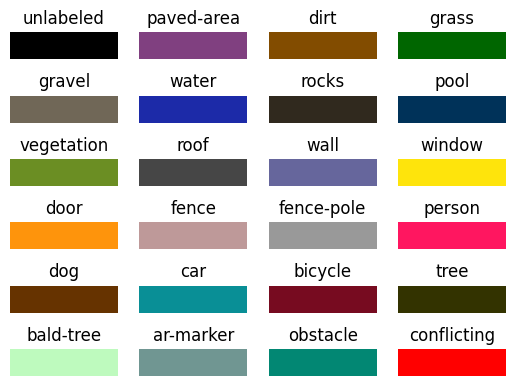

In [ ]:
# showing the colours of the labels
def print_label_colors():
    for index, label in enumerate(labels.name):
        plt.subplot(6, 4, index+1)
        (r, g, b)=labels.iloc[index].values[1:]
        img_ = np.array([[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]])
        plt.title(label)
        plt.imshow(img_)
        plt.axis('off')

print_label_colors()

In [ ]:
def plt_image_and_mask_by_path(img_list, mask_lst, n = 3):
  for i in range(3):
    img1=imageio.imread(img_list[i])
    mask1=imageio.imread(mask_lst[i])
    _,arr = plt.subplots(1, 2, figsize = (10, 10))
    arr[0].imshow(img1)
    arr[0].axis('off')
    arr[1].imshow(mask1)
    arr[1].axis('off')

In [ ]:
def plt_image_and_mask_with_dataset(image_ds, mask_ds):
    _,arr = plt.subplots(1,2,figsize=(10,10))
    arr[0].imshow(tf.keras.preprocessing.image.array_to_img(image_ds))
    arr[0].axis('off')
    arr[1].imshow(tf.keras.preprocessing.image.array_to_img(mask_ds))
    arr[1].axis('off')

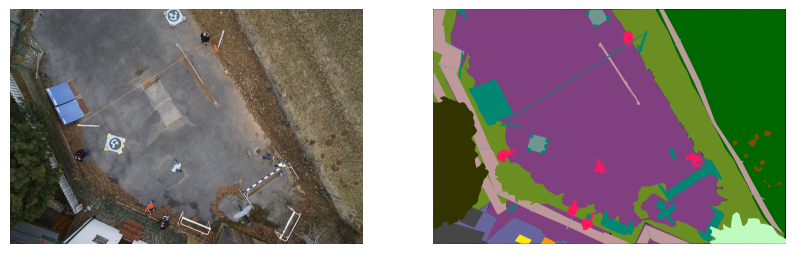

In [ ]:
image_names  = tf.constant(inp_img_list)
mask_names = tf.constant(labelll)

dataset = tf.data.Dataset.from_tensor_slices((inp_img_list, mask_list))
for image,mask in dataset.take(2):
    img=tf.io.read_file(image)
    img=tf.io.decode_png(img,channels=3)

    msk=tf.io.read_file(mask)
    msk=tf.io.decode_png(msk,channels=3)

plt_image_and_mask_with_dataset(img, msk)

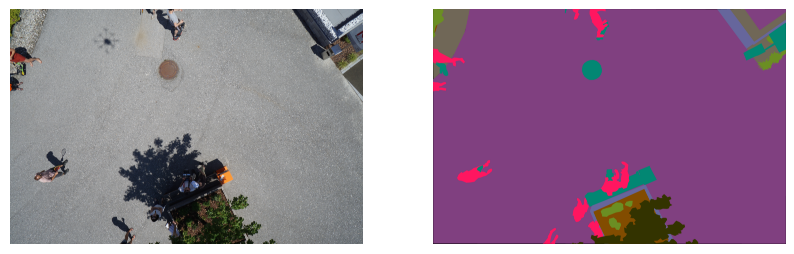

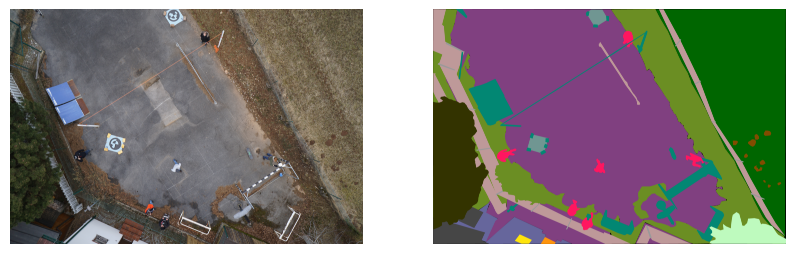

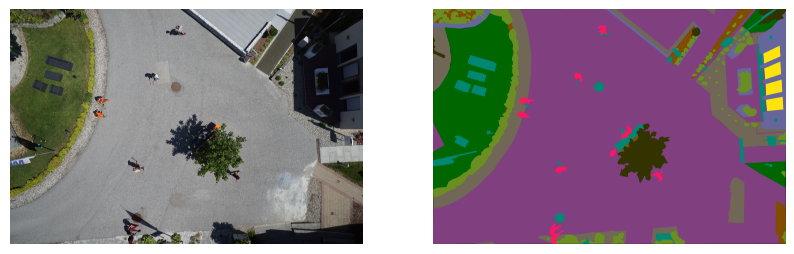

In [ ]:
# showing some examples
plt_image_and_mask_by_path(inp_img_list, mask_list, 3)

In [ ]:
labels

,name,r,g,b
0,unlabeled,0,0,0
1,paved-area,128,64,128
2,dirt,130,76,0
3,grass,0,102,0
4,gravel,112,103,87
5,water,28,42,168
6,rocks,48,41,30
7,pool,0,50,89
8,vegetation,107,142,35
9,roof,70,70,70


In [ ]:
len(labels)

24

In [ ]:
len(inp_img_list)

400

In [ ]:
len(mask_list)

400

In [ ]:
class_list = labels.name.values.tolist() # get the class names
print(class_list)
len(class_list) #how many?

['unlabeled', 'paved-area', 'dirt', 'grass', 'gravel', 'water', 'rocks', 'pool', 'vegetation', 'roof', 'wall', 'window', 'door', 'fence', 'fence-pole', 'person', 'dog', 'car', 'bicycle', 'tree', 'bald-tree', 'ar-marker', 'obstacle', 'conflicting']


24

## Pre-processing and normalising the data

### Dataset

In [ ]:
class DroneDataset(Dataset):
    def __init__(self, imgs_dir, masks_dir, start_idx, count):
        self.imgs_dir = imgs_dir # path to the image directory
        self.masks_dir = masks_dir # path to the mask directory

        imgs_paths = os.listdir(self.imgs_dir) # get all the image paths
        imgs_paths.sort() # sort the paths

        mask_paths = os.listdir(self.masks_dir) # get all the mask paths
        mask_paths.sort() # sort the paths

        self.imgs_paths = imgs_paths[start_idx:start_idx + count] # get the image paths
        self.mask_paths = mask_paths[start_idx:start_idx + count] # get the mask paths

    def __len__(self):
        return len(self.imgs_paths) # return the length

    def __getitem__(self, idx):
        img = read_image(os.path.join(self.imgs_dir, self.imgs_paths[idx]), ImageReadMode.RGB) # read the image given an index
        mask = read_image(os.path.join(self.masks_dir, self.mask_paths[idx]), ImageReadMode.GRAY) # read the mask given the index

        return img, mask # return the mask and the image

In [ ]:
def img_transform(img, mask, is_val=False, size=520):
    img = img.to(device) #send the imageto GPU
    mask = mask.to(device) #send the mask to GPU

    img = img.float() / 255.0 #convert to float and normalise

    if not is_val: #if not validation
        trans_img = torch.nn.Sequential(
            transforms.Resize([size, size]), #resize the image
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #normalise
            #transforms.RandomRotation(degrees=10), #rotate 10 degrees
            #transforms.RandomAutocontrast(p=0.2), #randomly change the contrast
            #transforms.RandomHorizontalFlip(p=0.5), #randomly flip the image
            #transforms.RandomVerticalFlip(p=0.5) #randomly flip the image
        )
    else:
        trans_img = trans_img = torch.nn.Sequential(
            transforms.Resize([size, size]), #resize the image
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #normalise, without data augmentation
        )

    trans_mask = torch.nn.Sequential(
        transforms.Resize([size, size]) #resize the mask
    )
    trans_img = trans_img.to(device) #send the image to GPU
    trans_mask = trans_mask.to(device)#send the mask to GPU

    img = trans_img(img) #transform the image
    mask = trans_mask(mask) #transform the mask

    return img, mask.squeeze(1).long() #return the image and the mask

In [ ]:
torchvision.models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT.transforms() #load the transforms

SemanticSegmentation(
    resize_size=[520]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
length = len(os.listdir(image_dir)) # how many images
length

400

In [ ]:
# split the data in 60-20-20
# getting the lenghts
train_dataset_len = int(length * 0.6)
val_test_dataset_len = length - train_dataset_len

val_start_idx = train_dataset_len
val_dataset_len = int(val_test_dataset_len * 0.2)
test_start_idx = val_start_idx + val_dataset_len
test_dataset_len = val_test_dataset_len - val_dataset_len

#create the datasets
train_dataset = DroneDataset(image_dir, mask_dir, 0, train_dataset_len)
val_dataset = DroneDataset(image_dir, mask_dir, val_start_idx, val_dataset_len)
test_dataset = DroneDataset(image_dir, mask_dir, test_start_idx, test_dataset_len)

In [ ]:
batch_size = 4 #set thebatch size

#create the dataloaders
train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=0)

In [ ]:
# function to calculate the pixel accuracy used as metric to evaluate the model
def pixel_accuracy(mask, output):
    output_softmax = F.softmax(output, dim=1)
    output_argmax = torch.argmax(output_softmax, dim=1)
    bool_tensor = (torch.flatten(mask)) == (torch.flatten(output_argmax))
    return torch.sum(bool_tensor) / torch.numel(bool_tensor)

## Building a NN architecture

In [ ]:
# load deeplabv3 with weights
model = torchvision.models.segmentation.deeplabv3_resnet50(weights=torchvision.models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT,
                                                    progress=True)

In [ ]:
from torch.nn import CrossEntropyLoss
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler

loss = CrossEntropyLoss().to(device) #define a loss function to be minimized
learning_rate = 1e-1 #define the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) #define an optimizer
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1) #define a lr scheduler

In [ ]:
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
from torchvision.models.segmentation.fcn import FCNHead
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.classifier = DeepLabHead(2048, 24) # adapted classifier from DeepLabV3 to my specific problem
model.aux_classifier = FCNHead(1024, 24) # adapted auxiliar classifier from DeepLabV3 to my specific problem
model = model.to(device) # send the model to the device

In [ ]:
#training and validation
def training_model(model, loss, scheduler, optimizer, train_loader, val_loader, epoch_count: int, es_steps: int):

    train_losses = [] #list to store the training loss
    val_losses = [] #list to store the validation loss

    train_accs = [] #list to store the training accuracy
    val_accs = [] #list to store the validation accuracy
    count_steps = 0 #count the number of steps

    train_len = len(train_loader) #get the length
    val_len = len(val_loader)#get the length
    print(train_len)#get the length
    print(val_len)#get the length

    best_score = 1e4 #set the best score

    for epoch in range(epoch_count): #for each epoch
        if count_steps >= es_steps: #if the number of steps is greater than or equal to the threshold specified (3)
            print("Early stopping!") #stop and print the msg
            break

        train_loss_sum = 0 #reset the training loss
        train_pixel_acc = 0 #reset the training pixel accuracy

        model.train() #set the model to training mode
        for img_batch, mask_batch in tqdm(train_loader): #for each batch
            img_batch = img_batch.to(device, non_blocking=True) #send the batch to the device
            mask_batch = mask_batch.to(device, non_blocking=True)
            img_batch, mask_batch = img_transform(img_batch, mask_batch, is_val=False) #transform the batch

            optimizer.zero_grad() #zero the gradient

            output_batch = model(img_batch) #send the batch to the model
            loss_value = loss(output_batch['out'], mask_batch) #calculate the loss

            train_pixel_acc += pixel_accuracy(mask_batch, output_batch['out']).detach() #calculate the pixel accuracy
            train_loss_sum += loss_value.detach() #calculate the loss

            loss_value.backward() #calculate the gradient
            optimizer.step() #update the parameters

            del output_batch #delete the output

        train_loss = train_loss_sum / train_len #calculate the training loss
        train_acc = train_pixel_acc / train_len #calculate the training accuracy

        train_losses.append(train_loss) #add the training loss
        train_accs.append(train_acc) #add the training accuracy

        print(f"Epoch {epoch+1} / {epoch_count} | train loss = {train_loss} | train acc = {train_acc}") #print the msg



        model.eval() #set the model to evaluation mode

        val_loss_sum = 0 #reset the validation loss
        val_pixel_acc = 0 #reset the validation pixel accuracy

        for img_batch, mask_batch in tqdm(val_loader): #for each batch
            img_batch = img_batch.to(device, non_blocking=True) #send the batch to the device
            mask_batch = mask_batch.to(device, non_blocking=True)
            img_batch, mask_batch = img_transform(img_batch, mask_batch, is_val=True) #transform the batch

            output_batch = model(img_batch)#send the batch to the model
            loss_value = loss(output_batch['out'], mask_batch)#calculate the loss

            val_loss_sum = val_loss_sum + loss_value.detach() #calculate the loss
            val_pixel_acc = val_pixel_acc + pixel_accuracy(mask_batch, output_batch['out']).detach() #calculate the pixel accuracy

            del output_batch #delete the output

        val_loss = val_loss_sum / val_len #calculate the validation loss
        val_acc = val_pixel_acc / val_len #calculate the validation accuracy

        val_losses.append(val_loss) #add the validation loss
        val_accs.append(val_acc) #add the validation accuracy
        print(f"Epoch {epoch+1} / {epoch_count} | val loss = {val_loss} | val acc = {val_acc}") #print the msg

        scheduler.step(val_loss)

        if val_loss < best_score: #if the validation loss is less than the best score
            best_score = val_loss #set the best score
            count_steps = 0 #reset the count
            torch.save(model, "best_model.pt") #save the best model
        else:
            count_steps += 1 #increment the count
    return train_losses, train_accs, val_losses, val_accs

In [ ]:
#set some hyperparameters
num_epochs = 25
early_stopping = 10

In [ ]:
train_losses, train_accs, val_losses, val_accs = training_model(model, loss, scheduler, optimizer, train_loader, val_loader, num_epochs, early_stopping)

In [ ]:
import matplotlib.pyplot as plt
import torch

def plt_image_mask_pred_gt(model, img_list, mask_list, index):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    img = imageio.imread(img_list[index])
    mask = imageio.imread(mask_list[index])

    img_tensor = torch.from_numpy(img.astype(np.float32)).permute(2, 0, 1).unsqueeze(0).to(device) / 255.0

    with torch.no_grad():
        model.eval()
        output = model(img_tensor)
        pred_mask = torch.argmax(output['out'], dim=1).squeeze().cpu().numpy()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title("Input Image")

    axes[1].imshow(pred_mask)
    axes[1].axis('off')
    axes[1].set_title("Predicted Mask")

    axes[2].imshow(mask)
    axes[2].axis('off')
    axes[2].set_title("Ground Truth Mask")

    plt.tight_layout()
    plt.show()
    return(img, pred_mask, mask)

In [ ]:
def mask_pred_gt(model, img_list, mask_list, index):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # device

    img = imageio.imread(img_list[index]) # (H, W, C) image
    mask = imageio.imread(mask_list[index]) #mask reading

    img_tensor = torch.from_numpy(img.astype(np.float32)).permute(2, 0, 1).unsqueeze(0).to(device) / 255.0 # (1, H, W, C) normalised

    with torch.no_grad(): # no gradient
        model.eval() # eval mode
        output = model(img_tensor) # output
        pred_mask = torch.argmax(output['out'], dim=1).squeeze().cpu().numpy() # (H, W)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # (H, W, C)

    axes[0].imshow(img) #image
    axes[0].axis('off') #off
    axes[0].set_title("Input Image") #title

    axes[1].imshow(pred_mask) #pred_mask
    axes[1].axis('off') #off
    axes[1].set_title("Predicted Mask") #title

    axes[2].imshow(mask) #gt mask
    axes[2].axis('off')#        off
    axes[2].set_title("Ground Truth Mask") #title

    plt.tight_layout() #tight layout
    plt.show()#show
    return(img, pred_mask, mask) #return the image, predicted mask and ground truth mask

In [ ]:
import matplotlib.pyplot as plt
import torch
# function for the dashboard

def dash(model, input_image, ground_truth_mask):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Set the device

    # Load the input image and ground truth mask
    img = imageio.imread(input_image)
    mask = imageio.imread(ground_truth_mask)

    # Preprocess the input image
    img_tensor = torch.from_numpy(img.astype(np.float32)).permute(2, 0, 1).unsqueeze(0).to(device) / 255.0

    # Generate the predicted mask using the model
    with torch.no_grad():
        model.eval() # EVALUATE
        output = model(img_tensor) # FORWARD PASS
        pred_mask = torch.argmax(output['out'], dim=1).squeeze().cpu().numpy() # PREDICT


    # Calculate Pixel Accuracy
    pixel_accuracy = np.sum(mask == pred_mask) / mask.size


    # Display the images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img) # Input Image
    axes[0].axis('off') # Remove the axis
    axes[0].set_title("Input Image") # Set the title

    axes[1].imshow(pred_mask) # Predicted Mask
    axes[1].axis('off') # Remove the axis
    axes[1].set_title("Predicted Mask") # Set the title

    axes[2].imshow(mask) # Ground Truth Mask
    axes[2].axis('off') # Remove the axis
    axes[2].set_title("Ground Truth Mask") # Set the title

    plt.tight_layout() # Tight layout
    plt.show() # Show
# print the metrics result

    print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

    # Return the metrics
    return pixel_accuracy

In [ ]:
#input image and ground truth mask are paths!
index=2 # Index of the image to visualise
dash(model, inp_img_list[index], mask_list[index]) # Visualise the image and ground truth mask

## Model performance

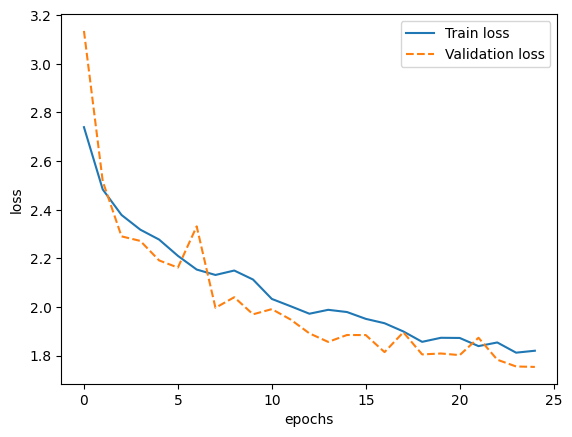

In [ ]:
train_losses = [x.cpu().item() for x in train_losses] # Train loss
val_losses = [x.cpu().item() for x in val_losses] # Validation loss
plt.plot(train_losses, linestyle="-", label="Train loss") # Train loss
plt.plot(val_losses, linestyle="--", label="Validation loss") # Validation loss --
plt.xlabel("epochs") # x-axis label
plt.ylabel("loss") # y-axis label
plt.legend()
plt.show() # Show the plot

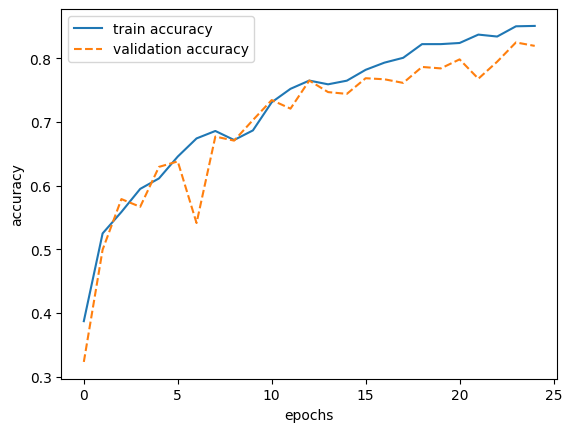

In [ ]:
train_accs = [x.cpu().item() for x in train_accs] # Train accuracy
val_accs = [x.cpu().item() for x in val_accs] # Validation accuracy

plt.plot(train_accs, linestyle="-", label ='train accuracy') # Train accuracy
plt.plot(val_accs, linestyle="--", label='validation accuracy') # Validation accuracy --
plt.xlabel("epochs") # x-axis label
plt.ylabel("accuracy") # y-axis label
plt.legend()
plt.show() # Show the plot

In [ ]:
torch.save(model, "/content/drive/MyDrive/Master degree AI/Environment/project5/best_model3.pt")

In [ ]:
# Load the saved model
model = torch.load("/content/drive/MyDrive/Master degree AI/Environment/project5/best_model3.pt")

In [ ]:
 model.eval() # Set the model in evaluation mode

test_loss_sum = 0 # Sum of the loss
test_pixel_acc = 0 # Pixel accuracy
#test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2)

for img_batch, mask_batch in tqdm(test_loader): # Iterate over the test loader
    img_batch = img_batch.to(device, non_blocking=True) # Move the img to the device
    mask_batch = mask_batch.to(device, non_blocking=True) # Move the mask to the device
    img_batch, mask_batch = img_transform(img_batch, mask_batch, is_val=True) # Apply the transforms

    output_batch = model(img_batch) # forward pass
    loss_value = loss(output_batch['out'], mask_batch) # Calculate the loss, not necessary

    test_loss_sum = test_loss_sum + loss_value.detach() # Add the loss
    test_pixel_acc = test_pixel_acc + pixel_accuracy(mask_batch, output_batch['out']).detach() # Add the pixel accuracy

test_loss = test_loss_sum / len(test_loader) # Calculate the average loss, not necessary
test_acc = test_pixel_acc / len(test_loader) # Calculate the average pixel accuracy

# print the results of the metrics
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Test loss: 1.6643927097320557
Test accuracy: 0.8461653590202332


In [ ]:
# Define label map
label_map = np.array([
    (0, 0, 0),  # unlabeled
    (128, 64, 128),  # paved-area
    (130, 76, 0),  # dirt
    (0, 102, 0),  # grass
    (112, 103, 87),  # gravel
    (28, 42, 168),  # water
    (48, 41, 30),  # rocks
    (0, 50, 89), # pool
    (107, 142, 35),  # vegetation
    (70, 70, 70),  # roof
    (102, 102, 156),  # wall
    (254, 228, 12),  # window
    (254, 148, 12),  # door
    (190, 153, 153),  # fence
    (153, 153, 153),  # fence-pole
    (255, 22, 96),  # person
    (102, 51, 0),  # dog
    (9, 143, 150),  # car
    (119, 11, 32),  # bicycle
    (51, 51, 0),  # tree
    (190, 250, 190),  # bald-tree
    (112, 150, 146),  # art-marker
    (2, 135, 115), # obstacle
    (255, 0, 0), # conflicting
])

#find a ranodm point in the mask, display it inthe image
from google.colab.patches import cv2_imshow
from matplotlib.patches import Circle
def find_random_point(mask, class_label):
    class_pixels = np.argwhere(mask == class_label) # Get the pixels of the class
    if len(class_pixels) > 0: # If there are pixels
        random_index = np.random.choice(len(class_pixels)) # Choose a random index
        random_pixel = class_pixels[random_index] # Get the random pixel

        return tuple(random_pixel)

    return None

# drawing the spot
def spot_land(image, mask):
    img=cv2.imread(image) # Load the image
    segmented=cv2.imread(mask, cv2.IMREAD_COLOR) # Load the mask
    class_of_interest=label_map[1] # Select the class of interest
    random_point=find_random_point(segmented, class_of_interest) # Find the random point
    if random_point is not None: # If there is a random point
        fig, ax = plt.subplots() # Create a figure and an axes
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Show the image
        circle = Circle((random_point[1], random_point[0]), radius=90, edgecolor=(0, 1, 0), facecolor='none', fill=False, linewidth=3) # Create a circle
        ax.add_patch(circle) # Add the circle
        plt.axis('off') # Hide the axis
        plt.show()

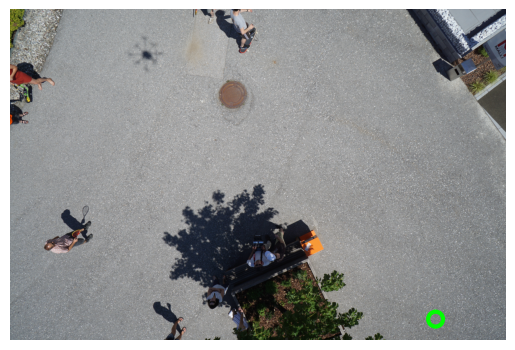

In [ ]:
#spotteddddd
# trying to spot, based on the ground truth mask
image = cv2.imread(inp_img_list[0])
mask = cv2.imread(mask_list[0], cv2.IMREAD_COLOR)  # load grey mask

# Select the class of interest
class_of_interest = label_map[1]

# Find the random point belonging to the class of interest
random_point = find_random_point(mask, class_of_interest)

if random_point is not None:
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    circle = Circle((random_point[1], random_point[0]), radius=90, edgecolor=(0, 1, 0), facecolor='none', fill=False, linewidth=3)
    ax.add_patch(circle)
    plt.axis('off')
    plt.show()

In [ ]:
# array of the labels
label_map = np.array([
    (0, 0, 0),  # unlabeled
    (128, 64, 128),  # paved-area
    (130, 76, 0),  # dirt
    (0, 102, 0),  # grass
    (112, 103, 87),  # gravel
    (28, 42, 168),  # water
    (48, 41, 30),  # rocks
    (0, 50, 89), # pool
    (107, 142, 35),  # vegetation
    (70, 70, 70),  # roof
    (102, 102, 156),  # wall
    (254, 228, 12),  # window
    (254, 148, 12),  # door
    (190, 153, 153),  # fence
    (153, 153, 153),  # fence-pole
    (255, 22, 96),  # person
    (102, 51, 0),  # dog
    (9, 143, 150),  # car
    (119, 11, 32),  # bicycle
    (51, 51, 0),  # tree
    (190, 250, 190),  # bald-tree
    (112, 150, 146),  # art-marker
    (2, 135, 115), # obstacle
    (255, 0, 0), # conflicting
])

def draw_segmentation_map(outputs):
    labels = torch.argmax(outputs.squeeze(), dim=0).numpy()  # Get the labels

    # Initialise 3 Numpy arrays
    # Each pixel will be filled with respective RGB pixels

    red_map   = np.zeros_like(labels).astype(np.uint8)
    green_map = np.zeros_like(labels).astype(np.uint8)
    blue_map  = np.zeros_like(labels).astype(np.uint8)

    for label_num in range(0, len(label_map)):
        index = labels == label_num # get the array index with pixels equal to the label

        R, G, B = label_map[label_num] # get the RGB values

        red_map[index]   = R #assigning rgb values in the index pixels
        green_map[index] = G
        blue_map[index]  = B

    segmentation_map = np.stack([red_map, green_map, blue_map], axis=2) # stack the arrays
    return segmentation_map

def segmentale_a_caso(model=model ,imgs_paths=image_list, num_images=2, image_dir='/content/drive/MyDrive/Master degree AI/Environment/project5/original_images', device=device):


    device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    preprocess = transforms.Compose([
      transforms.Resize([520, 520]),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Randomly select 'num_images' from the whole set for inference.
    selected_images = np.random.choice(imgs_paths, num_images, replace=False)

    # Iterate over selected images
    for img_name in selected_images:

        # Load and pre-process image.
        image_path = os.path.join(image_dir, img_name)
        img_raw = Image.open(image_path).convert("RGB")
        W, H = img_raw.size[:2] # Get image size
        img_t = preprocess(img_raw)
        img_t = torch.unsqueeze(img_t, dim=0).to(device)

        # Model Inference
        with torch.no_grad():
            output = model(img_t)["out"].cpu()

        # Get RGB segmentation map
        segmented_image = draw_segmentation_map(output)

        # Resize to original image size
        segmented_image = cv2.resize(segmented_image, (W, H), cv2.INTER_LINEAR)

        # Plot
        plt.figure(figsize=(12, 10), dpi=100)
        plt.subplot(1, 3, 1)
        plt.axis("off")
        plt.title("Image")
        plt.imshow(np.asarray(img_raw))

        plt.subplot(1, 3, 2)
        plt.title("Segmentation")
        plt.axis("off")
        plt.imshow(segmented_image)

        plt.show()
        plt.close()


    return

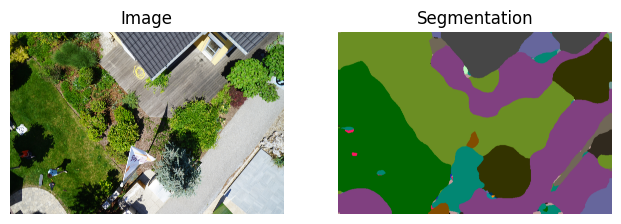

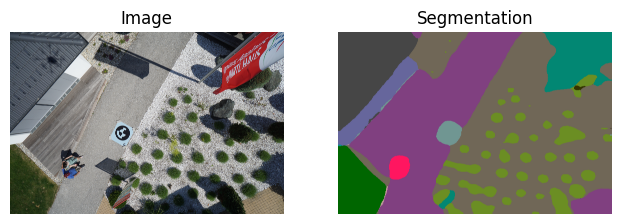

In [ ]:
segmentale_a_caso()

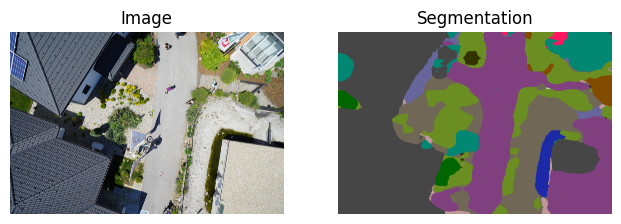

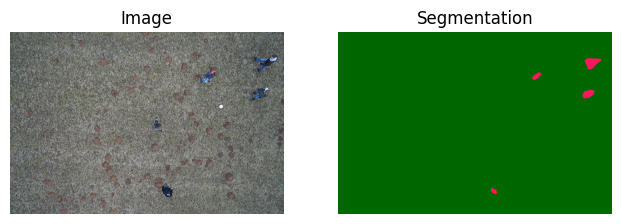

In [ ]:
segmentale_a_caso()

In [ ]:
def preddd(inp_img, ground_truth_mask, model=model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    preprocess = transforms.Compose([
      transforms.Resize([520, 520]),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load the input image and ground truth mask
    img = imageio.imread(inp_img)
    mask = imageio.imread(ground_truth_mask)

    # Preprocess the input image
    img_tensor = torch.from_numpy(img.astype(np.float32)).permute(2, 0, 1).unsqueeze(0).to(device) / 255.0

    img_raw = Image.open(inp_img).convert("RGB")
    W, H = img_raw.size[:2]
    img_t = preprocess(img_raw)
    img_t = torch.unsqueeze(img_t, dim=0).to(device)

    # Generate the predicted mask using the model
    with torch.no_grad():
        output = model(img_t)["out"].cpu()


    # Get RGB segmentation map
    segmented_image = draw_segmentation_map(output)

    # Resize to original image size
    segmented_image = cv2.resize(segmented_image, (W, H), cv2.INTER_LINEAR)

    # Plot
    plt.figure(figsize=(12, 10), dpi=100)
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.title("Input image")
    plt.imshow(np.asarray(img_raw))

    plt.subplot(1, 3, 2)
    plt.title("Segmentation")
    plt.axis("off")
    plt.imshow(segmented_image)

    plt.show()
    plt.close()

    return segmented_image, np.asarray(img_raw)

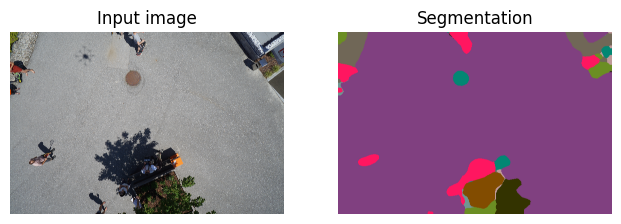

In [ ]:
preddd(inp_img_list[0], mask_list[0], model)

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib.patches import Circle
def find_random_point(mask, class_label):
    class_pixels = np.argwhere(mask == class_label) # get the array index with pixels equal to the label

    if len(class_pixels) > 0: # if there are pixels
        random_index = np.random.choice(len(class_pixels)) # get a random index
        random_pixel = class_pixels[random_index] # get the random pixel

        return tuple(random_pixel)

    return None

def spot_land(input_image, segmented_image, ax):
    class_of_interest = label_map[1] # class of interest
    random_point = find_random_point(segmented_image, class_of_interest) # get a random point
    if random_point is not None: # if there is a random point
        circle = Circle((random_point[1], random_point[0]), radius=90, edgecolor=(0, 1, 0), facecolor='none', fill=False, linewidth=3) # create a circle
        ax.add_patch(circle) # add the circle
    ax.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)) # plot the image
    ax.axis('off')


def seg_gt(index, model=model, device=device):


    device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    preprocess = transforms.Compose([
      transforms.Resize([520, 520]),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    selected_image=inp_img_list[index]
    selected_mask=mask_list[index]

    selected_mask=Image.open(selected_mask)

    img_raw = Image.open(selected_image).convert("RGB")
    W, H = img_raw.size[:2] # Get image size
    img_t = preprocess(img_raw)
    img_t = torch.unsqueeze(img_t, dim=0).to(device)

    # Generate the predicted mask using the model
    with torch.no_grad(): # No gradient
        output = model(img_t)["out"].cpu()

    # Get RGB segmentation map
    segmented_image = draw_segmentation_map(output)

    # Resize to original image size
    segmented_image = cv2.resize(segmented_image, (W, H), cv2.INTER_LINEAR)


    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

    spot_land(np.asarray(img_raw), segmented_image, axes[0])
    axes[0].set_title("Image with spot")

    axes[1].imshow(segmented_image)
    axes[1].set_title("Segmentation")
    axes[1].axis("off")

    axes[2].imshow(selected_mask)
    axes[2].set_title("Ground Truth mask")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()
    plt.close()


    return np.asarray(segmented_image), segmented_image, selected_mask

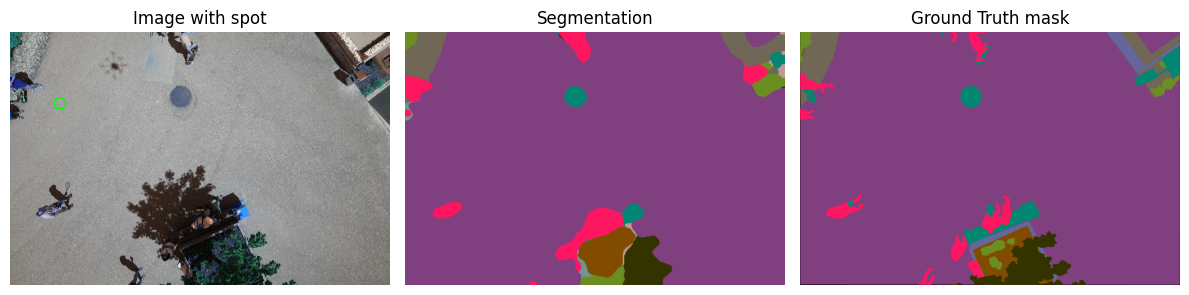

(array([[[107, 142,  35],
         [107, 142,  35],
         [107, 142,  35],
         ...,
         [190, 153, 153],
         [190, 153, 153],
         [190, 153, 153]],
 
        [[107, 142,  35],
         [107, 142,  35],
         [107, 142,  35],
         ...,
         [190, 153, 153],
         [190, 153, 153],
         [190, 153, 153]],
 
        [[107, 142,  35],
         [107, 142,  35],
         [107, 142,  35],
         ...,
         [190, 153, 153],
         [190, 153, 153],
         [190, 153, 153]],
 
        ...,
 
        [[128,  64, 128],
         [128,  64, 128],
         [128,  64, 128],
         ...,
         [128,  64, 128],
         [128,  64, 128],
         [128,  64, 128]],
 
        [[128,  64, 128],
         [128,  64, 128],
         [128,  64, 128],
         ...,
         [128,  64, 128],
         [128,  64, 128],
         [128,  64, 128]],
 
        [[128,  64, 128],
         [128,  64, 128],
         [128,  64, 128],
         ...,
         [128,  64, 128],
  

In [ ]:
seg_gt(0, model=model)

## Conclusion :

> Final pixel accuracy achieved is 85% on the test data. The results can easily be improved by adding a dropout, more epochs, a proper data augmentation, or by trying different neural architectures as the transformers, that now are the state-of-the-art, so for future developments I'm surely going to try a Segformer-like model.

## streamlit from colab!

In [4]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.7 MB/s eta 0:00:00


In [5]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=071278509fc20d3e1a7e916f629e070940bee39d24a77a2164c537d155401b4d
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [8]:
from pyngrok import ngrok

In [19]:
!./ngrok authtokens 2ROCp2G8mt5VBQSw9Z2KBXM1jj0_5jHMSDfefpYTQxage3rX1

/bin/bash: ./ngrok: No such file or directory


In [20]:
pip install streamlit torch imageio pandas numpy matplotlib scikit-learn

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')

In [ ]:
mask_list[index]

In [22]:
%%writefile streamlit_app.py
import streamlit as st
import torch
import imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import torchvision.transforms as transforms
import glob

import PIL
PIL.__version__
from PIL import Image
from glob import glob
import os
os.getcwd()
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow import io
import pandas as pd
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import torch
torch.__version__
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
torchvision.__version__
from torchvision import transforms


from torchvision.io import read_image, ImageReadMode
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable
from PIL import Image
import cv2

model = torch.load("/content/drive/MyDrive/Master degree AI/Environment/project5/best_model3.pt")

import pathlib
# read directories and labels file
image_dir = '/content/drive/MyDrive/Master degree AI/Environment/project5/original_images'
mask_dir = '/content/drive/MyDrive/Master degree AI/Environment/project5/label_images_semantic'
labels = pd.read_csv('/content/drive/MyDrive/Master degree AI/Environment/project5/class_dict_seg.csv')



image_list = os.listdir(image_dir) # get all the image paths
mask_list=os.listdir(mask_dir) # get all the mask paths
# sort the paths
image_list.sort()
mask_list.sort()
inp_img_list = [os.path.join(image_dir,i) for i in image_list] # get the image paths
mask_list = [os.path.join(mask_dir,i) for i in mask_list] # get the mask paths


labelll='/content/drive/MyDrive/Master degree AI/Environment/project5/RGB_color_image_masks'
image_list1 = os.listdir(image_dir) # get all the image paths
mask_list1=os.listdir(mask_dir) # get all the mask paths
# sort the paths
image_list1.sort()
mask_list1.sort()
inp_img_list1 = [os.path.join(image_dir,i) for i in image_list1] # get the image paths
mask_list1 = [os.path.join(labelll,i) for i in mask_list1]




device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Set the device

# Define label map
label_map = np.array([
    (0, 0, 0),  # unlabeled
    (128, 64, 128),  # paved-area
    (130, 76, 0),  # dirt
    (0, 102, 0),  # grass
    (112, 103, 87),  # gravel
    (28, 42, 168),  # water
    (48, 41, 30),  # rocks
    (0, 50, 89), # pool
    (107, 142, 35),  # vegetation
    (70, 70, 70),  # roof
    (102, 102, 156),  # wall
    (254, 228, 12),  # window
    (254, 148, 12),  # door
    (190, 153, 153),  # fence
    (153, 153, 153),  # fence-pole
    (255, 22, 96),  # person
    (102, 51, 0),  # dog
    (9, 143, 150),  # car
    (119, 11, 32),  # bicycle
    (51, 51, 0),  # tree
    (190, 250, 190),  # bald-tree
    (112, 150, 146),  # art-marker
    (2, 135, 115), # obstacle
    (255, 0, 0), # conflicting
])

def pixel_accuracy(mask, output):
    output_softmax = F.softmax(output, dim=1)
    output_argmax = torch.argmax(output_softmax, dim=1)

    bool_tensor = (torch.flatten(mask)) == (torch.flatten(output_argmax))

    return torch.sum(bool_tensor) / torch.numel(bool_tensor)

def intersection_over_union(mask, output):
    output_softmax = F.softmax(output, dim=1)
    output_argmax = torch.argmax(output_softmax, dim=1)

    intersection = torch.logical_and(mask, output_argmax)
    union = torch.logical_or(mask, output_argmax)

    return torch.sum(intersection) / torch.sum(union)

def draw_segmentation_map(outputs):
    labels = torch.argmax(outputs.squeeze(), dim=0).numpy()

    # Create 3 Numpy arrays containing zeros.
    # Later each pixel will be filled with respective red, green, and blue pixels
    # depending on the predicted class.

    red_map   = np.zeros_like(labels).astype(np.uint8)
    green_map = np.zeros_like(labels).astype(np.uint8)
    blue_map  = np.zeros_like(labels).astype(np.uint8)

    for label_num in range(0, len(label_map)):
        index = labels == label_num

        R, G, B = label_map[label_num]

        red_map[index]   = R
        green_map[index] = G
        blue_map[index]  = B

    segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
    return segmentation_map

from google.colab.patches import cv2_imshow
from matplotlib.patches import Circle
def find_random_point(mask, class_label):
    class_pixels = np.argwhere(mask == class_label)

    if len(class_pixels) > 0:
        random_index = np.random.choice(len(class_pixels))
        random_pixel = class_pixels[random_index]

        return tuple(random_pixel)

    return None

def spot_land(input_image, segmented_image, ax):
    class_of_interest = label_map[1]
    random_point = find_random_point(segmented_image, class_of_interest)
    if random_point is not None:
        input_image_copy = input_image.copy()  # Copy the image
        circle_center = (random_point[1], random_point[0])
        cv2.circle(input_image_copy, circle_center, radius=90, color=(0, 255, 0), thickness=10)
        im = cv2.cvtColor(input_image_copy, cv2.COLOR_BGR2RGB)
    else:
        im = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        st.write("No good spot detected")

    return im

from torchvision.transforms.functional import to_tensor


def seg_gt(index, model=model, device=device):


    device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    preprocess = transforms.Compose([
      transforms.Resize([520, 520]),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    selected_image=inp_img_list[index]
    selected_mask=mask_list[index]
    rgb_mask=mask_list1[index]

    selected_mask=Image.open(selected_mask)
    rgb_mask=Image.open(rgb_mask)

    img_raw = Image.open(selected_image).convert("RGB")
    W, H = img_raw.size[:2]
    img_t = preprocess(img_raw)
    img_t = torch.unsqueeze(img_t, dim=0).to(device)

    # no gradient
    with torch.no_grad():
        output = model(img_t)["out"].cpu()

    # Get RGB segmentation map
    segmented_image = draw_segmentation_map(output)

    # Resize to original image size
    segmented_image = cv2.resize(segmented_image, (W, H), cv2.INTER_LINEAR)


    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

    im=spot_land(np.asarray(img_raw), segmented_image, axes[0])
    spot_land(np.asarray(img_raw), segmented_image, axes[0])
    axes[0].set_title("Image with spot")

    axes[1].imshow(segmented_image)
    axes[1].set_title("Segmentation")
    axes[1].axis("off")

    axes[2].imshow(rgb_mask)
    axes[2].set_title("Ground Truth mask")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()
    plt.close()

    st.image([im, segmented_image, rgb_mask], caption=["Image with spot", "Segmentation", "Ground Truth mask"])

    return np.asarray(segmented_image), segmented_image, selected_mask

def perform_inference(model=model, imgs_paths=image_list, num_images=2, image_dir='/content/drive/MyDrive/Master degree AI/Environment/project5/original_images', device=device):


    device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    preprocess = transforms.Compose([
      transforms.Resize([520, 520]),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    # Load image handles for the validation set.

    # Randomly select 'num_images' from the whole set for inference.
    selected_images = np.random.choice(imgs_paths, num_images, replace=False)

    # Iterate over selected images
    for img_name in selected_images:

        # Load and pre-process image.
        image_path = os.path.join(image_dir, img_name)
        img_raw = Image.open(image_path).convert("RGB")
        W, H = img_raw.size[:2]
        img_t = preprocess(img_raw)
        img_t = torch.unsqueeze(img_t, dim=0).to(device)

        # Model Inference
        with torch.no_grad():
            output = model(img_t)["out"].cpu()

        # Get RGB segmentation map
        segmented_image = draw_segmentation_map(output)

        # Resize to original image size
        segmented_image = cv2.resize(segmented_image, (W, H), cv2.INTER_LINEAR)

        # Plot
        plt.figure(figsize=(12, 10), dpi=100)
        plt.subplot(1, 3, 1)
        plt.axis("off")
        plt.title("Image")
        plt.imshow(np.asarray(img_raw))

        plt.subplot(1, 3, 2)
        plt.title("Segmentation")
        plt.axis("off")
        plt.imshow(segmented_image)

        plt.show()
        plt.close()

        st.image([img_raw, segmented_image], caption=["Input Image", "Segmentation"])


    return

def random_prediction():
    perform_inference()

# Add a placeholder for the "Labels" option
label_option = st.empty()

# Check if "Labels" option is clicked
if label_option.button("Labels"):
    img_path = "/content/drive/MyDrive/Master degree AI/Environment/project5/labels.png"
    st.image(img_path, caption="labels")

def main():
    st.title("Image Segmentation and Spot Detection Dashboard")
    indice_a = st.number_input("Please insert an index between 0 and 192", min_value=0, max_value=192, step=1)

    def is_valid_index(index):
        return 0 <= index < 192

    # is valid?
    if st.button("Confirm"):
        if is_valid_index(indice_a):
            st.success(f"Selected image no. {indice_a}")
            seg_gt(indice_a, model)

        else:
            st.error("Index not valid. Retry.")

    if st.button("Get 2 Random Segmentations"):
        random_prediction()
if __name__ == "__main__":
    main()

Overwriting streamlit_app.py


In [24]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

[##................] | fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki

npx: installed 22 in 2.339s
your url is: https://fresh-shrimps-dance.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.133.10.182:8501

2023-06-29 07:04:00.290132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  Stopping...
^C
